In [121]:
# All neccessary imports
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

| Column Name     | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| num_preg        | Number of times the patient has been pregnant                               |
| glucose_conc    | Plasma glucose concentration (from an oral glucose tolerance test)          |
| diastolic_bp    | Diastolic blood pressure (mm Hg) — lower number in BP reading               |
| thickness       | Skin fold thickness (in mm), usually triceps skinfold — an estimate of body fat |
| insulin         | 2-Hour serum insulin (mu U/ml) — measures insulin level in the blood        |
| bmi             | Body Mass Index = weight (kg) / height² (m²)                                |
| diab_pred       | Diabetes pedigree function — estimates genetic influence based on family history |
| age             | Age of the person (in years)                                                |
| skin            | This may be a duplicate or alternate column for skin thickness (depending on the dataset version) |


In [93]:
def wrangle(file):
    df = pd.read_csv(file)
    
    # change the target to a binary digits
    df["diabetes"] = df["diabetes"].astype(int)
    
    # drop feature with multicollinearity
    df.drop(columns="skin", inplace=True)
    return df

In [94]:
#load csv
df = wrangle("pima-data.csv")

In [85]:
#set target
target = "diabetes"

In [86]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [88]:
# check columns with multicollinearity
corr = df.drop(columns="diabetes").corr()

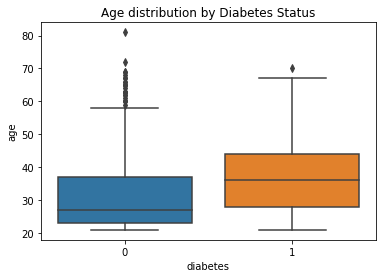

In [168]:
#Box plot to check how age determines diabetes
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age distribution by Diabetes Status')
plt.show()


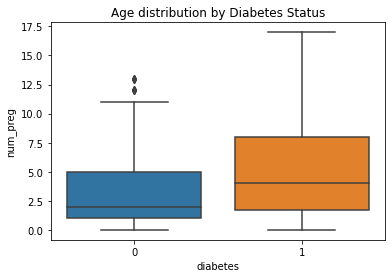

In [170]:
#Box plot to check pregnancy distribution
sns.boxplot(x='diabetes', y='num_preg', data=df)
plt.title('Age distribution by Diabetes Status')
plt.show()


In [171]:
df.groupby(df[""])

TypeError: You have to supply one of 'by' and 'level'

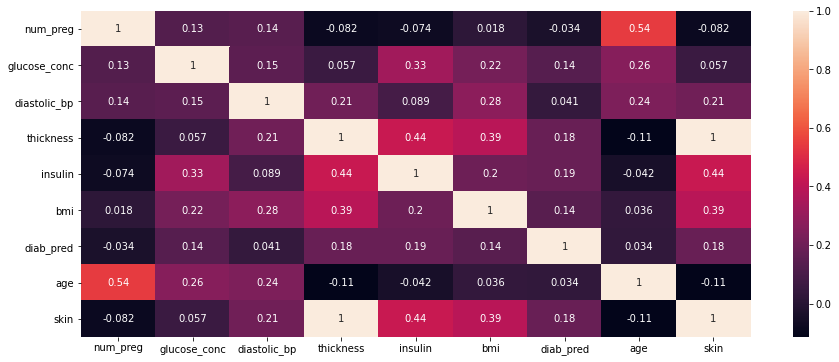

In [89]:
#Check correlation using heatmap
plt.subplots(figsize=(15,6))
sns.heatmap(corr, annot=True);

In [97]:
#Check all columns with zero as value
cols = df.drop(columns=target).columns
cols

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age'],
      dtype='object')

In [98]:
for col in cols:
    print(f"{col}: {(df[col] == 0).sum()}")

num_preg: 111
glucose_conc: 5
diastolic_bp: 35
thickness: 227
insulin: 374
bmi: 11
diab_pred: 0
age: 0


In [99]:
cols = list(cols)

In [100]:
cols.remove("num_preg")

In [104]:
#Replace all 0 with mean 
for col in cols:
    df[col].replace(0, df[col].mean(), inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    float64
 2   diastolic_bp  768 non-null    float64
 3   thickness     768 non-null    float64
 4   insulin       768 non-null    float64
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   diabetes      768 non-null    int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 51.1 KB


In [108]:
#Seperate the minority and majority class
major,minor = df[target].value_counts(normalize=True)

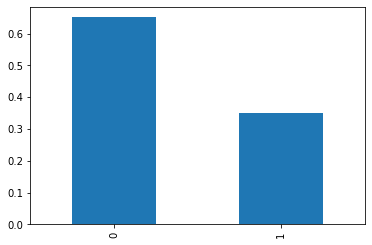

In [111]:
#plot barchart to visualize distribution between true and false
df[target].value_counts(normalize=True).plot(kind="bar");

In [117]:
# set X and y
X = df.drop(columns=target)
y = df[target]

In [135]:
#split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [136]:
# Calculate baseline accuracy score
baseline_as = df[target].value_counts(normalize=True).max()
baseline_as

0.6510416666666666

In [140]:
print(f'''
X_train: {X_train.shape}
y_train: {y_train.shape}
X_test: {X_test.shape}
y_test: {y_test.shape}
''')



X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)



In [145]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [147]:
model.predict(X_train)[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [152]:
training_as= accuracy_score(y_train, model.predict(X_train))
training_as

0.7687296416938111

In [155]:
y_pred = model.predict(X_test)

In [153]:
test_as = accuracy_score(y_test, model.predict(X_test))
test_as

0.7662337662337663

In [156]:
dict_test = {
    "y_test": y_test,
    "y_pred": y_pred
}

In [157]:
df_test = pd.DataFrame(dict_test)

In [161]:
df_test[:20]

,y_test,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,0
568,0,1
148,0,1


In [167]:
importances = model.coef_[0]
features = X_train.columns
features

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age'],
      dtype='object')